IUM Etap 1 Analiza danych

Piotr Grabowski, Marcin Lusawa

In [36]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os


In [37]:
#load data
data_path = 'data'
csv_files = ['calendar', 'listings', 'reviews', 'sessions', 'users']

dataframes = {}

for file_name in csv_files:
    file_path = os.path.join(data_path, f'{file_name}.csv', f'{file_name}.csv')
    try:
        dataframes[file_name] = pd.read_csv(file_path)
        print(f"File {file_name}.csv  shape: {dataframes[file_name].shape}")
    except FileNotFoundError:
        print(f"File {file_path} not found")

calendar_df = dataframes.get('calendar')
listings_df = dataframes.get('listings') 
reviews_df = dataframes.get('reviews')
sessions_df = dataframes.get('sessions')
users_df = dataframes.get('users')


File calendar.csv  shape: (6311104, 7)
File listings.csv  shape: (17271, 79)
File listings.csv  shape: (17271, 79)
File reviews.csv  shape: (963832, 6)
File reviews.csv  shape: (963832, 6)
File sessions.csv  shape: (13014324, 4)
File sessions.csv  shape: (13014324, 4)
File users.csv  shape: (926491, 7)
File users.csv  shape: (926491, 7)


### Analiza calendar.csv

In [38]:
calendar_df.head()


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,4.227007e+07,2025-12-17,t,NaN,NaN,NaN,730.0
1,NaN,NaN,NaN,$190.00,NaN,NaN,NaN
2,1.138531e+18,NaN,NaN,$370.00,NaN,NaN,28.0
3,NaN,NaN,NaN,NaN,NaN,4.0,NaN
4,NaN,NaN,NaN,$170.00,NaN,3.0,10.0


In [39]:
calendar_df.isna().mean()
print(f"Łączna liczba pustych pozycji per kolumna:\n{calendar_df.isnull().sum()}\n")
print(f"Łączna liczba wierszy z jakąkolwiek pustą pozycją: {calendar_df.isnull().any(axis=1).sum()}")
print(f"Procent wierszy z pustymi wartościami: {(calendar_df.isnull().any(axis=1).sum() / len(calendar_df)) * 100:.2f}%")
print(calendar_df.describe(include='all'))

Łączna liczba pustych pozycji per kolumna:
listing_id        4417648
date              4418188
available         4415841
price             4420161
adjusted_price    6309980
minimum_nights    4420148
maximum_nights    4421030
dtype: int64

Łączna liczba wierszy z jakąkolwiek pustą pozycją: 6311104
Łączna liczba wierszy z jakąkolwiek pustą pozycją: 6311104
Procent wierszy z pustymi wartościami: 100.00%
Procent wierszy z pustymi wartościami: 100.00%
          listing_id        date available    price adjusted_price  \
count   1.893456e+06     1892916   1895263  1890943           1124   
unique           NaN         375         2      872            162   
top              NaN  2025-05-24         t  $100.00      $1,500.00   
freq             NaN        5342   1075535    93088            105   
mean    6.516048e+17         NaN       NaN      NaN            NaN   
std     5.457610e+17         NaN       NaN      NaN            NaN   
min     2.737000e+03         NaN       NaN      NaN        

### Wnioski

Te dane nie są użyteczne do projektu, ponieważ nie zawierają żadnych informacji o jakości pobytu, treści recenzji lub innych informacji przydatnych do modelu. Zbiór zawiera jedynie dokładniejsze informacje o ofercie (dostępność, liczba nocy etc.)

Dodatkowo zbiór jest bardzo niekompletny (100% wierszy zawiera najmniej jedną wartość brakującą). Zbiór jest zatem nieprzydatny do realizacji zadania.


### Analiza listings.csv

In [40]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4.237913e+07,NaN,2.025031e+13,NaN,city scrape,ART HOUSE TERMINI -TRIPLE ROOM -WIFI-COLOSSEO,Housed in a recently renovated historic buildi...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2025-03-12,city scrape,NaN,NaN,NaN,NaN,16611461.0,...,NaN,NaN,4.74,NaN,NaN,69.0,NaN,NaN,NaN,1.43
2,1.141103e+18,NaN,NaN,NaN,city scrape,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.43,NaN,NaN,NaN,NaN,0.0,NaN,NaN
3,NaN,NaN,2.025031e+13,NaN,previous scrape,KAMCHŪ APARTMENTS SINGLE bedroom with PRIVATE ...,NaN,NaN,https://a0.muscache.com/pictures/d6c97434-a2ae...,270954123.0,...,NaN,NaN,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN
4,NaN,NaN,2.025031e+13,2025-03-15,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [41]:
print("\n Ile brakuje w kolumnach:")
listings_df.isna().mean().sort_values(ascending=False)


neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
host_neighbourhood              0.894679
host_about                      0.861907
neighborhood_overview           0.849227
                                  ...   
listing_url                     0.696138
maximum_maximum_nights          0.695212
number_of_reviews               0.694633
host_since                      0.694517
minimum_minimum_nights          0.694112
Length: 79, dtype: float64

### Wnioski
Zbiór nie zawiera informacji, które pozwalają zrozumieć co goście chwalą lub krytykują. Zawiera jedynie informacje przydatne do opisu lokalu, ale nie do modelu (adres,typ, opis ogólny etc.). Zbiór bardzo niekompletny - dużo kolumn ma znaczące braki danych w danych (>80%).

Zbiór może być jedynie przydatny do mapowanie listing_id na nazwę lokalu i dodanie dodatkowych informacji o lokalu np. w generowanym raporcie, ale nie jest przydatny do samego modelu.

### Analiza reviews.csv

In [42]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,4434042.0,3.248899e+07,NaN,19357614.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,如果还来罗马的话，还是会选择住在这边。
2,10918986.0,NaN,NaN,NaN,Anastasia,"Solo nos hospedamos por una noche, haciendo es..."
3,NaN,1.152815e+18,2024-05-09,26180028.0,NaN,NaN
4,NaN,6.875232e+17,2022-08-06,NaN,NaN,NaN


In [43]:
reviews_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963832 entries, 0 to 963831
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   listing_id     289039 non-null  float64
 1   id             288792 non-null  float64
 2   date           289136 non-null  object 
 3   reviewer_id    288868 non-null  float64
 4   reviewer_name  289659 non-null  object 
 5   comments       289079 non-null  object 
dtypes: float64(3), object(3)
memory usage: 44.1+ MB


In [44]:
print("\n Ile brakuje w kolumnach:")
missing_perc = reviews_df.isna().mean().sort_values(ascending=False)
print(missing_perc)



 Ile brakuje w kolumnach:
id               0.700371
reviewer_id      0.700292
listing_id       0.700115
comments         0.700073
date             0.700014
reviewer_name    0.699471
dtype: float64
id               0.700371
reviewer_id      0.700292
listing_id       0.700115
comments         0.700073
date             0.700014
reviewer_name    0.699471
dtype: float64


In [ ]:

# ile recenzji zawiera listing_id i comment
valid_reviews = reviews_df.dropna(subset=['listing_id', 'comments'])
print("Liczba recenzji z niepustym listing_id i komentarzem:", len(valid_reviews))
print("Procent tych recenzji:", str(round(len(valid_reviews) / len(reviews_df) * 100, 2)) + "%")


# ile listing ma chociaz 1 recenzje
num_listings = reviews_df['listing_id'].nunique()
num_valid_listings = valid_reviews['listing_id'].nunique()

print("Liczba unikalnych listingów:", num_listings)
print("Liczba listingów z co najmniej 1 poprawną recenzją:", num_valid_listings)


Liczba recenzji z niepustym listing_id i komentarzem: 86710
Procent takich recenzji: 9.0%
Liczba unikalnych listingów: 23098
Liczba listingów z co najmniej 1 poprawną recenzją: 17766


/tmp/ipykernel_1072/900542646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_reviews['len'] = valid_reviews['comments'].astype(str).apply(len)


Średnia długość komentarza: 275.2227655403068
Mediana długości komentarza: 209.0
Procent komentarzy krótszych niż 20 znaków: 3.39 %


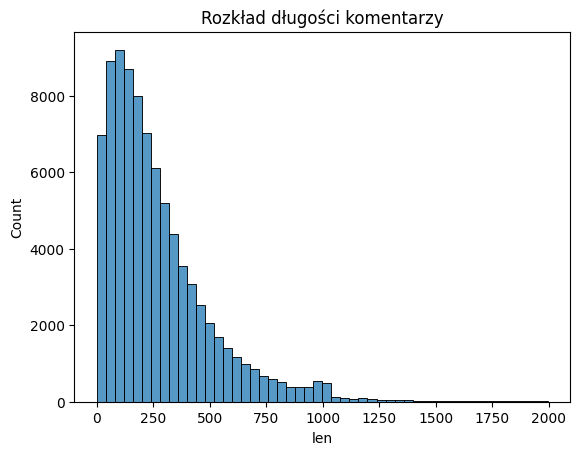

In [55]:
# dlugosc komentarzy
valid_reviews['len'] = valid_reviews['comments'].astype(str).apply(len)

print("Średnia długość komentarza:", valid_reviews['len'].mean())
print("Mediana długości komentarza:", valid_reviews['len'].median())
print("Procent komentarzy krótszych niż 20 znaków:",
      round((valid_reviews['len'] < 20).mean() * 100, 2), "%")

sns.histplot(valid_reviews[valid_reviews['len'] < 2000]['len'], bins=50)
plt.title("Rozkład długości komentarzy")
plt.show()


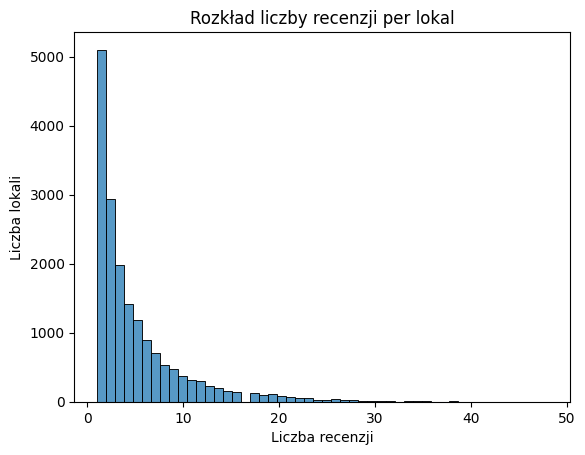

Średnia recenzji na lokal: 4.880670944500732
Mediana recenzji na lokal: 3.0
Liczba lokali z conajmniej 5 recenzjami: 5137


In [57]:

# recenzje per lokal
reviews_per_listing = valid_reviews.groupby('listing_id').size()

sns.histplot(reviews_per_listing[reviews_per_listing < 50], bins=50)
plt.title("Rozkład liczby recenzji per lokal")
plt.xlabel("Liczba recenzji")
plt.ylabel("Liczba lokali")
plt.show()

print("Średnia recenzji na lokal:", reviews_per_listing.mean())
print("Mediana recenzji na lokal:", reviews_per_listing.median())

print("Liczba lokali z conajmniej 5 recenzjami:", (reviews_per_listing > 5).sum())


comments
en       184
fr        29
it        28
es        26
de        10
pt         5
zh-cn      4
pl         4
sv         2
ru         2
nl         1
af         1
tr         1
ko         1
da         1
lt         1
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='comments'>

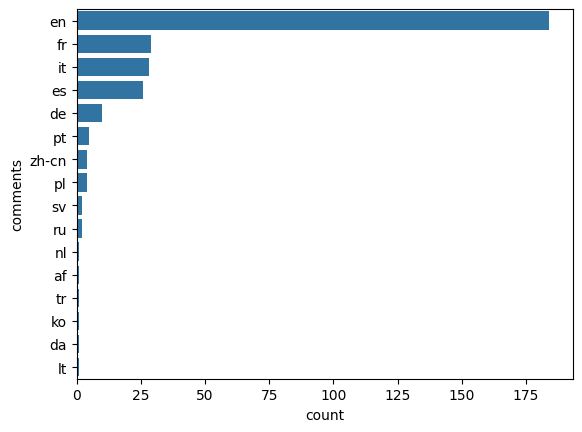

In [58]:
#  Jakie wystepuja jezyki w recenzji - na próbce

from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

sample = valid_reviews['comments'].sample(300, random_state=0)
langs = sample.apply(lambda x: detect(str(x)))
print(langs.value_counts())
sns.countplot(y=langs, order=langs.value_counts().index)

/tmp/ipykernel_1072/248169486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_date_reviews['date'] = pd.to_datetime(valid_date_reviews['date'], errors='coerce')


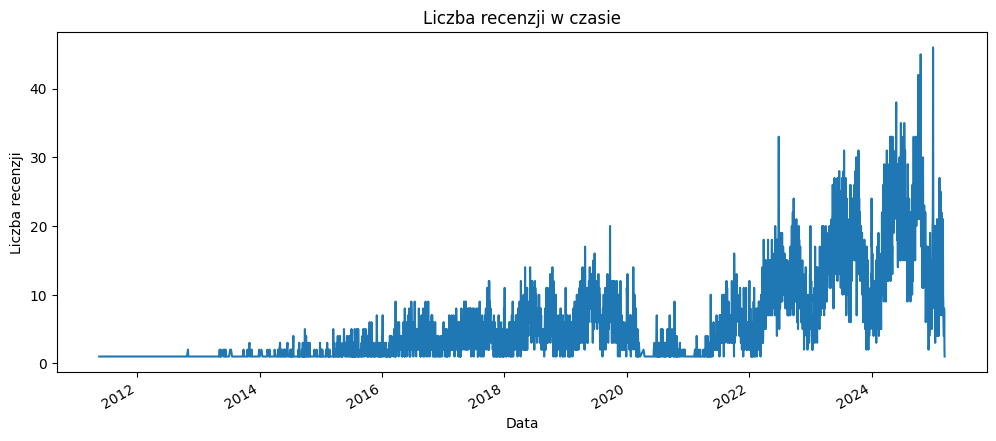

In [59]:
# liczba recenzji w czasie
valid_date_reviews = valid_reviews.dropna(subset=['date'])
valid_date_reviews['date'] = pd.to_datetime(valid_date_reviews['date'], errors='coerce')
valid_date_reviews = valid_date_reviews.dropna(subset=['date'])

valid_date_reviews['date'].value_counts().sort_index().plot(figsize=(12,5))
plt.title("Liczba recenzji w czasie")
plt.xlabel("Data")
plt.ylabel("Liczba recenzji")
plt.show()

### Wnioski

Zbiór reviews_df zawiera recenzje użytkowników i jest najbardziej przydatny do realizacji zadania, gdyż niesie informacje o recenzjach użytkowników w postaci komentarzy. Kolumna comment zawiera opinie, listing_id umożliwia przypisanie ja do lokalu, a kolumna date pozwala również na analizę w czasie.

Jedynie 9% danych zawiera zarówno recenzje jak i listing_id - czyli dane konieczne w modelu, ale jest to ponad 86 000 danych, więc ilość powinna być wystarczająca do stworzenia modelu.

Większość recenzji jest wystarczająco długość by zawierać sensowne opinie (tylko 3% ma <20 znaków)

Wiele lokali ma niewiele recenzji (mediana to 3), a jedynie ~5000 lokali ma >=5 recenzji (uważamy, że to minimalna liczba by stworzyć faktyczny i sensowny ranking aspektów). Dla pozostałych lokali ranking będzie bardziej losowy przez małą ilość danych. (potrzeba więcej danych z kompletnymi kolumnami zarówno comment i listing_id)

Recenzje pisane są w różnych językach, ale w większości (~60% na próbce) są w języku angielskim. Wielojęzyczność nie uniemożliwia jednak zrealizowanie zadania. 

Dane z recenzji zebrane są na przestrzeni 10 lat i posiadają okresy wysokiej i niskiej aktywności - czyli sezony w ciągu roku. Z powodu ich rozłożenia w czasie można również analizować trendy w recenzjach.

Reasumując - prośba odnośnie danych do Zarządu Nocarz:

Przydałoby się więcej danych zawierających recenzje dla lokali (ulepszy to jakość rankingu aspektów i zmniejszy jego losowość). 

Przydałyby się również, aby otrzymać dane, gdzie recenzje są w jednym języku (ułatwi to zadanie, ale nie jest niezbędne do realizacji)


### Analiza sessions.csv

In [50]:
sessions_df.head()


,action,user_id,timestamp,listing_id
0,browse_listings,NaN,NaN,NaN
1,NaN,19357614.0,2024-11-24T07:39:23.297462,NaN
2,view_listing,19357614.0,2024-11-24T08:29:29.297462,NaN
3,NaN,NaN,NaN,1.021727e+18
4,NaN,19357614.0,NaN,1.198543e+18


In [51]:
print("\n Ile brakuje w kolumnach:")
sessions_df.isna().mean().sort_values(ascending=False)


listing_id    0.722323
user_id       0.700049
timestamp     0.700037
action        0.700028
dtype: float64

### Wnioski
Dane o sesjach użytkownika (zawierają aktywności użytkowników na stronie) nie niosą informacji o recenzjach, zatem są zbędne do modelu. Zbiór również w znacznej cześci niekompletny - 70% wartości w każdej kolumnie zawiera braki.


### Analiza users.csv

In [52]:
users_df.head()


,id,name,surname,city,street,street_number,postal_code
0,15920846.0,NaN,NaN,Bielsk Podlaski,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,20-601
2,88977707.0,NaN,Maciocha,Olkusz,NaN,NaN,NaN
3,NaN,Lidia,Wasilewicz,NaN,NaN,98/23,NaN
4,NaN,NaN,NaN,NaN,Piaskowa,70/49,NaN


In [53]:
print("\n Ile brakuje w kolumnach:")
users_df.isna().mean().sort_values(ascending=False)


name             0.700582
city             0.700537
id               0.700114
postal_code      0.699920
street_number    0.699816
surname          0.699644
street           0.699604
dtype: float64

### Wnioski
Zbiór nie niesie informacji odnośnie recenzji, a jedynie prywatne dane osobowe, które nie są potrzebne do oceny recenzji oraz nie powinny być użyte ze względu na prywatność użytkowników. Dane te również nie zostają wykorzystane w modelu.